<a href="https://colab.research.google.com/github/scsanjay/ml_from_scratch/blob/main/04.%20Linear%20Regression/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

## Custom implementation of Linear Regression

**Gradient calculations [https://i.imgur.com/WEe3Q8H.jpeg](https://i.imgur.com/WEe3Q8H.jpeg)**

In [2]:
class LinearRegression():
  """
  SGD implementation of Linear Regression

  Parameters
  ----------
  penalty : {'l1', 'l2'}, default l2

  alpha : float, default = 0.0001
    multiplier for the regularisation term
  
  eta0 : float, default = 0.001
    initial learning rate

  epoch : int, default = 1000

  Attributes
  ----------
  weights : array of size n_features

  bias : float
  """

  def __init__ (self, penalty='l2', alpha=0.0001, eta0=0.001, epoch=1000):
    self.penalty = penalty
    self.alpha = alpha
    self.eta0 = eta0
    self.epoch = epoch

  def fit(self, X_train, y_train):
    """
    It will find a hyperplane that best separate the data.

    Parameters
    ----------
    X_train : array of shape (n_samples, n_features)

    Y_train : array of shape (n_samples)

    Returns
    -------
    self : object
    """

    # initialize weights and bias
    w = np.random.normal(size=len(X_train[0]))
    b = 0

    n = len(y_train)

    # epoch iterations
    for j in range(self.epoch):
      
      # loop over all training data
      for i in range(n):
        x = X_train[i]
        y = y_train[i]

        # weight gradient
        dw = -x * 2 * (y - (np.dot(w,x)+b))
        
        # regularization term based on penalty
        if (self.penalty=='l1'):
          # L1 regulariser
          dw += self.alpha*(w/np.dot(w, w))
        else:
          # L2 regulariser
          dw += 2*self.alpha*w

        # bias gradient
        db = -2 * (y - (np.dot(w,x)+b))

        # update weights and bias based on gradient and learning rate
        w = w-self.eta0*dw
        b = b-self.eta0*db
    
    # set weights and bias attributes
    self.weights = w
    self.bias = b
    return self

  def predict (self, X_test):
    """
    It will predict the output classes for the test data.

    Parameters
    ----------
    X_test : array of shape (n_samples, n_features)

    Returns
    -------
    predicted : array of shape (n_samples,)
    """
    # calculate predictions
    predictions = np.dot(self.weights, X_test.T)+self.bias

    return predictions 

## Checking validity of the custom implementation

In [46]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_boston()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size=.8)

stnd = StandardScaler()
stnd.fit(X_train)
X_train = stnd.transform(X_train)
X_test = stnd.transform(X_test)

### With L2 Regularisation

In [61]:
model = LinearRegression(alpha=0.0001, eta0=0.001, epoch = 1500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [62]:
r2_score(y_test, y_pred)

0.773821654049763

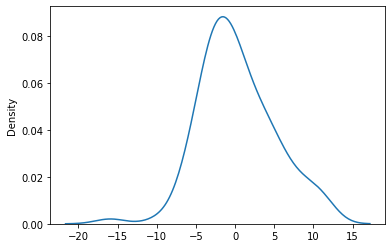

In [63]:
sns.kdeplot(y_test - y_pred)
plt.show()

**R2 score is close to 1 so that's good. Distribution of errors is gaussian distributed with mean 0 so that's good too.**

### With L1 Regularisation

In [64]:
model = LinearRegression(alpha=0.0001, eta0=0.001, epoch = 1500, penalty='l1')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [65]:
r2_score(y_test, y_pred)

0.7737965283449321

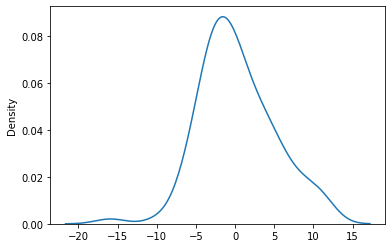

In [66]:
sns.kdeplot(y_test - y_pred)
plt.show()

It is very similar to what we got with l2 regulariser.